# 03 Feature importance analysis for ML algorithms
In this notebook, we aim to 

1. Analyse which features in the time series are more important to affect classification in the ML algorithm (SVM) used in the 02 classification notebook. 

## Identify what SVM is picking up (less important for now)
1. Run feature importance analysis to see what SVM is using to classify.
2. Test t-SNE or UMAP to check if PCA is the main reason for separability.
3. If SVM is using specific time points, introduce phase shifts or moving averages.
4. If SVM is using long-range correlations, tweak burst durations and stochasticity.

### Feature Importance Analysis by [Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html)
Permutation feature importance is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset. This technique is particularly useful for non-linear or opaque estimators, and involves **randomly shuffling the values of a single feature** and observing the resulting degradation of the model’s score. By breaking the relationship between the feature and the target, we determine how much the model relies on such particular feature.

The following code: 
- Trains the SVM on the simulated mRNA trajectories.
- Computes feature importance using permutation importance.
- Plots the importance of each time point, showing the mean and standard deviation.

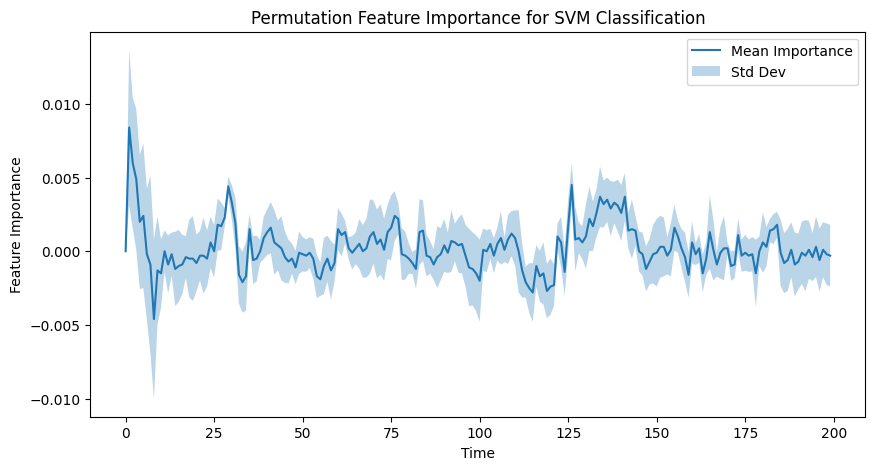

In [ ]:
# --- Feature Importance Analysis ---
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from tqdm import tqdm

# Load the mRNA trajectories dataset
df_results = pd.read_csv("~/stochastic_simulations/SSA_telegraph_model/traj_data/mRNA_trajectories.csv")
# Load dataset for SVM
X = df_results.iloc[:, 1:].values  # All time points as features
y = df_results["label"].values  # Labels

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X, y)

# Compute Permutation Feature Importance
perm_importance = permutation_importance(svm, X, y, n_repeats=10, random_state=42)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.plot(time_points, perm_importance.importances_mean, label='Mean Importance')
plt.fill_between(time_points, 
                 perm_importance.importances_mean - perm_importance.importances_std,
                 perm_importance.importances_mean + perm_importance.importances_std,
                 alpha=0.3, label='Std Dev')
plt.xlabel("Time")
plt.ylabel("Feature Importance")
plt.title("Permutation Feature Importance for SVM Classification")
plt.legend()
plt.show()
